## GiriÅŸ

Bu Ã§alÄ±ÅŸma, Borsa Ä°stanbul 100 (BIST100) endeksine ait 04.01.2000â€“24.07.2020 tarihleri arasÄ±ndaki geÃ§miÅŸ verileri kullanarak, yÃ¼ksek volatilite ve ani fiyat dalgalanmalarÄ±nÄ±n gÃ¶rÃ¼ldÃ¼ÄŸÃ¼ gÃ¼nleri Ã¶nceden belirleyerek riski tahmin etmeyi amaÃ§lamaktadÄ±r. Bu doÄŸrultuda, teknik gÃ¶stergeler aracÄ±lÄ±ÄŸÄ±yla gÃ¼nlÃ¼k fiyat hareketlerinin ortalamadan sapma dÃ¼zeyi, gÃ¶reli volatilite oranÄ± ve gÃ¼nlÃ¼k yÃ¼zdelik deÄŸiÅŸim analiz edilmiÅŸtir. Elde edilen bu gÃ¶stergeler Ä±ÅŸÄ±ÄŸÄ±nda, belirli eÅŸik deÄŸerlerin aÅŸÄ±lmasÄ± durumunda gÃ¼nler "riskli" olarak etiketlenmiÅŸ ve bu sÄ±nÄ±flandÄ±rmalar Ã¼zerinden ertesi gÃ¼nÃ¼n risk durumunu Ã¶ngÃ¶ren bir makine Ã¶ÄŸrenmesi modeli geliÅŸtirilmiÅŸtir. Ã‡alÄ±ÅŸmanÄ±n amacÄ±; yatÄ±rÄ±m kararlarÄ±nda zamanlamayÄ± optimize edebilmek adÄ±na potansiyel riskli gÃ¼nlerin Ã¶nceden tahmin edilmesidir.


Bu kapsamda; veri analizi,gÃ¶rselleÅŸtirme, Ã¶zellik mÃ¼hendisliÄŸi, ,LogisticRegression ve  XGBoost  makine Ã¶ÄŸrenmesi modelleri uygulanacaktÄ±r.

In [211]:
# Gerekli kÃ¼tÃ¼phanelerin eklenmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# uyarÄ±larÄ± gÃ¶zardÄ± et
import warnings
warnings.filterwarnings("ignore")


In [212]:
# Dataset'i YÃ¼kle
df = pd.read_excel("BIST100.xlsx")

## Exploratory Data Analysis (EDA): Veri KeÅŸfi ve Ã–n Analiz

Bu veri seti BIST100 endeksinin gÃ¼nlÃ¼k iÅŸlem verilerini iÃ§ermektedir. Her bir satÄ±r bir gÃ¼ne aittir ve o gÃ¼nÃ¼n aÃ§Ä±lÄ±ÅŸ, kapanÄ±ÅŸ, en yÃ¼ksek ve en dÃ¼ÅŸÃ¼k deÄŸerleri ile iÅŸlem hacmini gÃ¶stermektedir.

In [213]:
df.head(10) # ilk 10 veri

Date          Open          High           Low         Close  \
0 2000-01-04  15208.799805  17639.300781  15208.799805  17512.199219   
1 2000-01-05  17512.199219  17802.099609  16237.700195  16932.000000   
2 2000-01-06  16932.000000  17460.699219  16086.799805  16200.000000   
3 2000-01-07  16200.000000  16305.599609  15623.500000  15837.400391   
4 2000-01-11  15837.400391  16388.300781  15293.200195  16347.400391   
5 2000-01-12  16347.400391  17304.199219  16347.400391  16933.599609   
6 2000-01-13  16933.599609  18256.800781  16933.599609  18138.199219   
7 2000-01-14  18138.199219  19332.099609  18138.199219  19110.300781   
8 2000-01-17  19110.300781  20617.900391  18301.300781  18458.300781   
9 2000-01-18  18458.300781  19577.300781  18182.500000  19577.300781   

      Adj Close    Volume  
0  17512.199219  54538700  
1  16932.000000  66720900  
2  16200.000000  66095000  
3  15837.400391  25444400  
4  16347.400391  53618400  
5  16933.599609  59691700  
6  18138.199219  73641700  
7  19110.300781  67855200  
8  18458.300781  73244200  
9  19577.300781  59548700

| SÃ¼tun AdÄ±     | AÃ§Ä±klama                                                                                                                               |
| ------------- | -------------------------------------------------------------------------------------------------------------------------------------- |
| **Date**      | Ä°ÅŸlem gÃ¼nÃ¼ tarihi.                                                                                                                     |
| **Open**      | GÃ¼nÃ¼n aÃ§Ä±lÄ±ÅŸ fiyatÄ±. (Endeksin gÃ¼ne baÅŸladÄ±ÄŸÄ± deÄŸer)                                                                                   |
| **High**      | GÃ¼n iÃ§inde ulaÅŸÄ±lan en yÃ¼ksek fiyat.                                                                                                   |
| **Low**       | GÃ¼n iÃ§inde gÃ¶rÃ¼len en dÃ¼ÅŸÃ¼k fiyat.                                                                                                     |
| **Close**     | GÃ¼nÃ¼n kapanÄ±ÅŸ fiyatÄ±. (Ä°ÅŸlem gÃ¼nÃ¼ bittiÄŸinde endeksin deÄŸeri)                                                                          |
| **Adj Close** | DÃ¼zeltmeli kapanÄ±ÅŸ fiyatÄ± (temettÃ¼ ve bÃ¶lÃ¼nme gibi etkilerden arÄ±ndÄ±rÄ±lmÄ±ÅŸ deÄŸer). Bu veri `Close` ile aynÄ±ysa dÃ¼zeltme yapÄ±lmamÄ±ÅŸtÄ±r. |
| **Volume**    | O gÃ¼n BIST100 endeksi bazÄ±nda gerÃ§ekleÅŸen toplam iÅŸlem hacmi (adet olarak deÄŸil, endeks bazlÄ±).                                        |


### Veri Setinden ilk 10 veriyi getir

In [214]:
df.tail(10) # son 10 veri

Date           Open           High            Low          Close  \
5137 2020-07-10  115450.898438  115450.898438  112829.398438  114808.601562   
5138 2020-07-13  116262.101562  118398.703125  116125.500000  118398.703125   
5139 2020-07-14  118113.796875  118657.601562  117002.203125  117741.101562   
5140 2020-07-16  118734.796875  119451.296875  118684.796875  118807.500000   
5141 2020-07-17  118864.601562  119161.101562  118360.601562  118786.101562   
5142 2020-07-20  118844.500000  119747.296875  118582.796875  119280.898438   
5143 2020-07-21  120170.898438  120585.601562  117160.500000  118042.000000   
5144 2020-07-22  118815.601562  119371.601562  117535.601562  118079.898438   
5145 2020-07-23  118714.000000  119672.398438  118585.398438  119031.203125   
5146 2020-07-24  118500.796875  119201.601562  118220.796875  119201.601562   

          Adj Close      Volume  
5137  114808.601562  5028187200  
5138  118398.703125  4458093300  
5139  117741.101562  5171757800  
5140  118807.500000  3856903200  
5141  118786.101562  2834136600  
5142  119280.898438  3549002100  
5143  118042.000000  4735656100  
5144  118079.898438  5163053900  
5145  119031.203125  3508334900  
5146  119201.601562  3165933000

### Eksik veri kontrolÃ¼

In [215]:
df.isnull().sum() # kolonlardaki eksik veri sayÄ±sÄ±nÄ±n toplamÄ±

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

#### TÃ¼m sayÄ±sal sÃ¼tunlar iÃ§in genel istatistikler

In [216]:
df.describe() # Temel istatistik bilgiler

Date           Open           High  \
count                           5147    5147.000000    5147.000000   
mean   2010-04-19 08:21:04.581309440   54426.460624   54910.784548   
min              2000-01-04 00:00:00    7159.700195    7477.399902   
25%              2005-03-09 12:00:00   24433.050781   24699.850586   
50%              2010-04-22 00:00:00   54730.699219   55175.800781   
75%              2015-06-06 12:00:00   79040.851562   79614.000000   
max              2020-07-24 00:00:00  124215.898438  124536.601562   
std                              NaN   31860.547211   32025.808602   

                 Low          Close      Adj Close        Volume  
count    5147.000000    5147.000000    5147.000000  5.147000e+03  
mean    53861.037433   54388.448239   54388.448239  5.718940e+08  
min      6796.899902    7159.700195    7159.700195  4.329000e+05  
25%     24057.849609   24428.150391   24428.150391  2.318878e+08  
50%     53959.898438   54719.000000   54719.000000  4.623890e+08  
75%     78416.699219   78975.500000   78975.500000  7.219930e+08  
max    122368.703125  123556.101562  123556.101562  7.668058e+09  
std     31642.109607   31807.239635   31807.239635  5.517501e+08

| Ä°statistik          | AÃ§Ä±lÄ±ÅŸ FiyatÄ±       | GÃ¼n Ä°Ã§i En YÃ¼ksek Fiyat       | 	GÃ¼n Ä°Ã§i En DÃ¼ÅŸÃ¼k Fiyat        | 	KapanÄ±ÅŸ FiyatÄ±      |DÃ¼zeltilmiÅŸ KapanÄ±ÅŸ FiyatÄ±| 	Ä°ÅŸlem Hacmi (Adet)        |
| ------------------- | ---------- | ---------- | ---------- | ---------- | ---------- | ------------- |
| **GÃ¶zlem SayÄ±sÄ±**   | 5,147      | 5,147      | 5,147      | 5,147      | 5,147      | 5,147         |
| **Ortalama**        | 54,426.46  | 54,910.78  | 53,861.04  | 54,388.45  | 54,388.45  | 571,894,000   |
| **Standart Sapma**  | 31,860.55  | 32,025.81  | 31,642.11  | 31,807.24  | 31,807.24  | 551,750,100   |
| **Minimum**         | 7,159.70   | 7,477.40   | 6,796.90   | 7,159.70   | 7,159.70   | 432,900       |
| **1. Ã‡eyrek (25%)** | 24,433.05  | 24,699.85  | 24,057.85  | 24,428.15  | 24,428.15  | 231,887,800   |
| **Medyan (50%)**    | 54,730.70  | 55,175.80  | 53,959.90  | 54,719.00  | 54,719.00  | 462,389,000   |
| **3. Ã‡eyrek (75%)** | 79,040.85  | 79,614.00  | 78,416.70  | 78,975.50  | 78,975.50  | 721,993,000   |
| **Maksimum**        | 124,215.90 | 124,536.60 | 122,368.70 | 123,556.10 | 123,556.10 | 7,668,058,000 |

* Tarih  04.01.2000-24.07.2020
* Ort kapanÄ±ÅŸ deÄŸeri 54 binlerdeyken standart sapma 32 binler ciavarÄ±nda ve Standart sapma oranÄ± yaklaÅŸÄ±k %58 civarÄ±ndadÄ±r. Bu sebeple yatrÄ±Ä±mcÄ±lar iÃ§in yÃ¼ksek risk ve yÃ¼ksek kazanÃ§ anlamÄ±na gelmektedir.(Volatilite YÃ¼ksek) 
* Ä°ÅŸlem hacminde Ã§ok yÃ¼ksek zirveler gÃ¶rÃ¼lÃ¼yor(* Ortalama hacim: 571 milyon ve Maksimum hacim: 7.6 milyar). Bu durum, dÃ¶nemsel olarak ani piyasa tepkilerinin veya yoÄŸun alÄ±m-satÄ±m faaliyetlerinin yaÅŸandÄ±ÄŸÄ±nÄ± dÃ¼ÅŸÃ¼ndÃ¼rebilir (Ã¶rneÄŸin kriz dÃ¶nemleri).
* FiyatlarÄ±n medyan ve ort deÄŸerleri birbirinbe oldukÃ§a yakÄ±n. Bu veri daÄŸÄ±lÄ±mÄ±nÄ±n nispeten dengeli olduÄŸunu gÃ¶sterir.
* Son olarak Ã§eyreklik daÄŸÄ±lÄ±ma bakÄ±ldÄ±ÄŸÄ±nda(%25-%75), endeksin zaman iÃ§inde yukarÄ± yÃ¶nlÃ¼ ciddi bir bÃ¼yÃ¼me kaydettiÄŸi ve bu bÃ¼yÃ¼menin veriye daÄŸÄ±lmÄ±ÅŸ olduÄŸu gÃ¶rÃ¼lÃ¼yor.

Veri seti zaman iÃ§inde belirgin bir bÃ¼yÃ¼me trendi(min, max ve mean deÄŸerlerin yola Ã§Ä±karak), artan iÅŸlem hacmi ve yÃ¼ksek volatilite barÄ±ndÄ±rmaktadÄ±r. Bu durum, Ã¶zellikle risk tahminleme ve volatilite analizi gibi makine Ã¶ÄŸrenmesi uygulamalarÄ± iÃ§in uygun olduÄŸu sÃ¶ylenebilir.

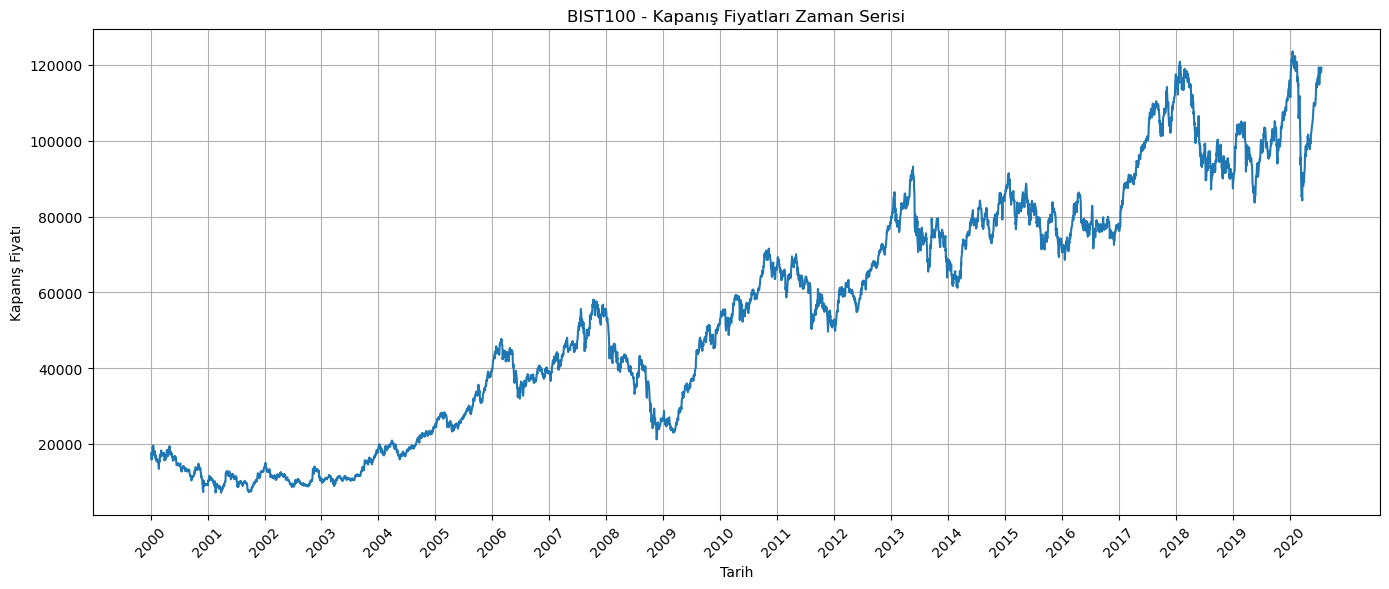

In [217]:
# YÄ±l bazlÄ± etiket iÃ§in sadece verideki gerÃ§ek yÄ±llarÄ± kullan
df["Date"] = pd.to_datetime(df["Date"]) 
df["Year"] = df["Date"].dt.year
unique_years = sorted(df["Year"].unique())
tick_dates = pd.to_datetime([f"{year}-01-01" for year in unique_years])  # sadece mevcut veriye gÃ¶re

plt.figure(figsize=(14, 6))
plt.plot(df["Date"], df["Close"])
plt.title("BIST100 - KapanÄ±ÅŸ FiyatlarÄ± Zaman Serisi")
plt.xlabel("Tarih")
plt.ylabel("KapanÄ±ÅŸ FiyatÄ±")

# X ekseni iÃ§in sadece mevcut veri aralÄ±ÄŸÄ±ndaki yÄ±l baÅŸlarÄ±
plt.xticks(ticks=tick_dates, labels=unique_years, rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

* Genel olarak yukarÄ± yÃ¶nlÃ¼ bir trend hÃ¢kim. Bu da BIST100â€™Ã¼n zamanla nominal olarak bÃ¼yÃ¼dÃ¼ÄŸÃ¼nÃ¼ gÃ¶steriyor.
* 2001â€“2002: Ekonomik kriz kaynaklÄ± sert dÃ¼ÅŸÃ¼ÅŸ (dot-com + TÃ¼rkiye iÃ§ krizi)
* 2008 kÃ¼resel finansal krizi dÃ¶neminde ciddi bir dÃ¼ÅŸÃ¼ÅŸ yaÅŸanmÄ±ÅŸ. ArdÄ±ndan toparlanma sÃ¼reci gÃ¶ze Ã§arpÄ±yor.
* 2013â€“2016: Yatay seyir ve belirsizlik dÃ¶nemleri (iÃ§ siyasi/ekonomik geliÅŸmeler)
* 2019-2020 yÃ¼ksek enflasyon ve kur etkisiyle endeksin nominal deÄŸeri artmÄ±ÅŸtÄ±r denilebilir.

### "BIST100 - GÃ¼nlÃ¼k YÃ¼zde DeÄŸiÅŸim"

#### Bu grafik, hangi dÃ¶nemlerde yÃ¼ksek oynaklÄ±k yaÅŸandÄ±ÄŸÄ±nÄ± gÃ¶sterir (Ã¶rneÄŸin 2008 krizi, pandemi dÃ¶nemi gibi).

`PctChange_t = ((Close_t - Close_{t-1}) / Close_{t-1}) * 100`

Close_t: t gÃ¼nÃ¼ndeki kapanÄ±ÅŸ fiyatÄ±

Close_{t-1}: bir Ã¶nceki gÃ¼nÃ¼n kapanÄ±ÅŸ fiyatÄ±

Bu FormÃ¼l;

BugÃ¼nkÃ¼ kapanÄ±ÅŸ fiyatÄ± ile dÃ¼nkÃ¼ kapanÄ±ÅŸ fiyatÄ± arasÄ±ndaki farkÄ±, dÃ¼nkÃ¼ kapanÄ±ÅŸ fiyatÄ±na bÃ¶lmek, sonra da 100 ile Ã§arparak yÃ¼zde olarak ifade etmek.


df["PctChange"] => Endeksin kapanÄ±ÅŸ fiyatÄ±ndaki gÃ¼nlÃ¼k yÃ¼zde deÄŸiÅŸimi hesaplar. pct_change() fonksiyonu, her bir gÃ¼nÃ¼n kapanÄ±ÅŸ fiyatÄ±nÄ± bir Ã¶nceki gÃ¼nle karÅŸÄ±laÅŸtÄ±rarak oransal deÄŸiÅŸimi verir. Bu deÄŸer 100 ile Ã§arpÄ±larak yÃ¼zde formatÄ±na dÃ¶nÃ¼ÅŸtÃ¼rÃ¼lÃ¼r. Bu oran, fiyatÄ±n ne kadar hÄ±zlÄ± ve sert deÄŸiÅŸtiÄŸini gÃ¶stermek iÃ§in temel bir gÃ¶stergedir.

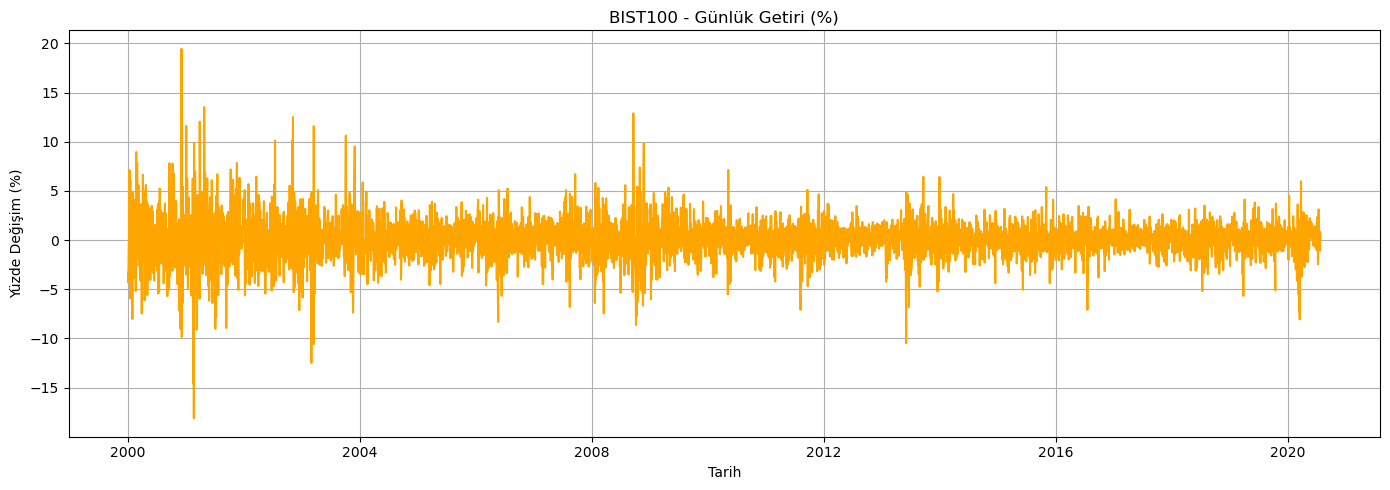

In [218]:
df["PctChange"] = df["Close"].pct_change() * 100  # % olarak deÄŸiÅŸim

plt.figure(figsize=(14, 5))
plt.plot(df["Date"],df["PctChange"], color="orange")
plt.title("BIST100 - GÃ¼nlÃ¼k Getiri (%)")
plt.xlabel("Tarih")
plt.ylabel("YÃ¼zde DeÄŸiÅŸim (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


### BIST100 KapanÄ±ÅŸ FiyatlarÄ±nÄ±n DaÄŸÄ±lÄ±mÄ± (Boxplot)

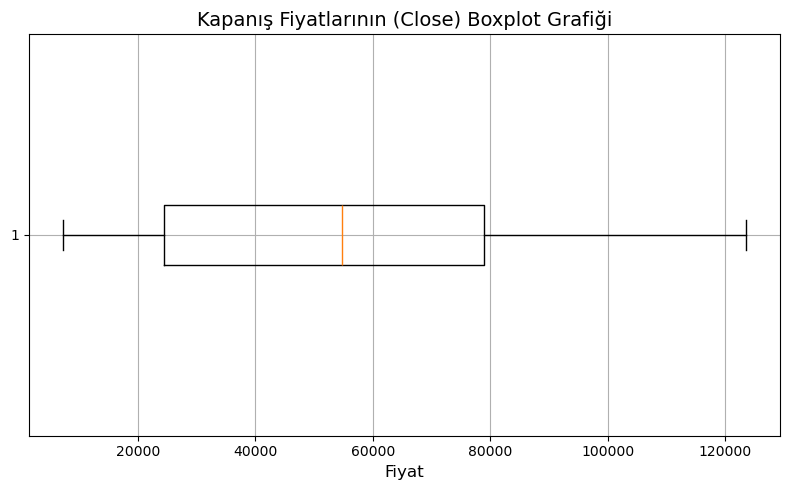

In [219]:
plt.figure(figsize=(8, 5))
plt.boxplot(df["Close"], vert=False)
plt.title("KapanÄ±ÅŸ FiyatlarÄ±nÄ±n (Close) Boxplot GrafiÄŸi", fontsize=14)
plt.xlabel("Fiyat", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

### YÄ±llara GÃ¶re Ortalama KapanÄ±ÅŸ FiyatÄ±(BIST100)

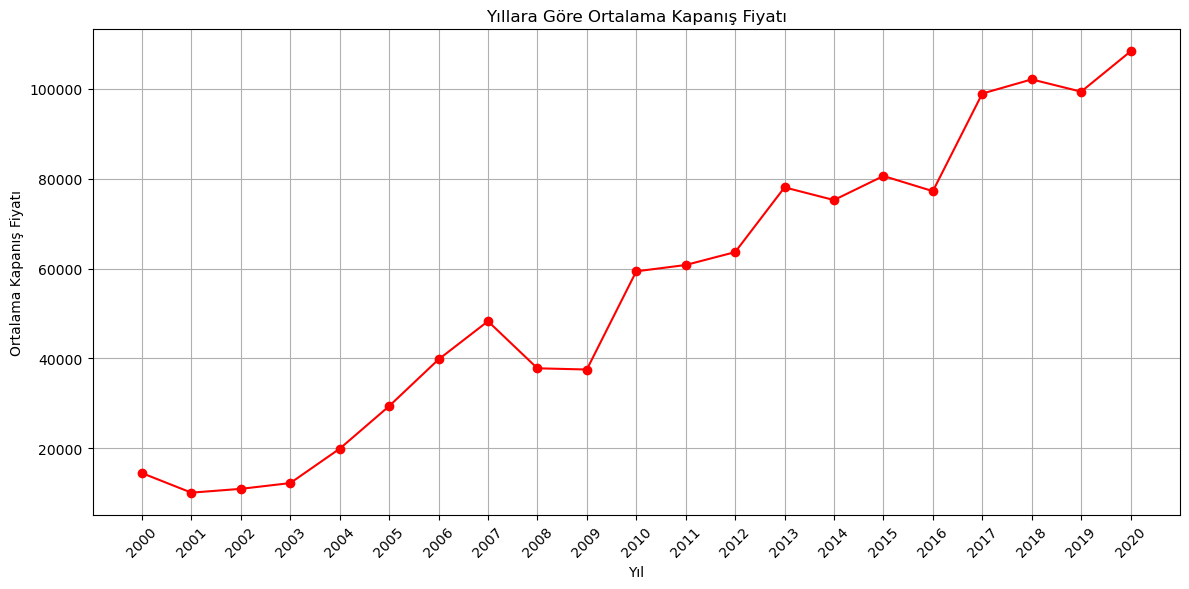

In [220]:
# YÄ±llÄ±k ortalama kapanÄ±ÅŸ fiyatÄ±nÄ± hesapla
yearly_avg_close = df.groupby("Year")["Close"].mean().reset_index()

# Grafik
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg_close["Year"], yearly_avg_close["Close"], marker='o', color='red')

# BaÅŸlÄ±k ve eksenler
plt.title("YÄ±llara GÃ¶re Ortalama KapanÄ±ÅŸ FiyatÄ±")
plt.xlabel("YÄ±l")
plt.ylabel("Ortalama KapanÄ±ÅŸ FiyatÄ±")

# TÃ¼m yÄ±llarÄ± x eksenine yaz
plt.xticks(yearly_avg_close["Year"], rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

* Grafik boyunca iniÅŸ-Ã§Ä±kÄ±ÅŸlar gÃ¶zlemlenebilir; bunlar ekonomik dalgalanmalara (krizler, bÃ¼yÃ¼me dÃ¶nemleri vs.) karÅŸÄ±lÄ±k gelir.

* 2000'li yÄ±llarÄ±n baÅŸÄ±nda fiyatlar 10.000 â€“ 20.000 bandÄ±nda seyrederken, 2020â€™ye yaklaÅŸtÄ±kÃ§a kapanÄ±ÅŸ fiyatlarÄ±nda belirgin bir artÄ±ÅŸ gÃ¶rÃ¼lmektedir.

* Bu yÃ¼kseliÅŸ, uzun vadeli artan trendi ve zamanla deÄŸer kazanÄ±mÄ±nÄ± aÃ§Ä±kÃ§a gÃ¶stermektedir.

* AyrÄ±ca bazÄ± keskin dÃ¼ÅŸÃ¼ÅŸler de dikkat Ã§ekmektedir.
    + Bu dÃ¼ÅŸÃ¼ÅŸler bÃ¼yÃ¼k olasÄ±lÄ±kla 2001 krizi, 2008 kÃ¼resel kriz ve benzeri ekonomik olaylara iÅŸaret eder.

* 2010 sonrasÄ± dÃ¶nemde genel bir artÄ±ÅŸ gÃ¶rÃ¼lmekte, 2017 sonrasÄ± hÄ±zlÄ± yÃ¼kseliÅŸ dikkat Ã§ekmektedir.
* KapanÄ±ÅŸ fiyatlarÄ± dÃ¼zenli olarak artmÄ±ÅŸ.



<Figure size 7500x3000 with 0 Axes>

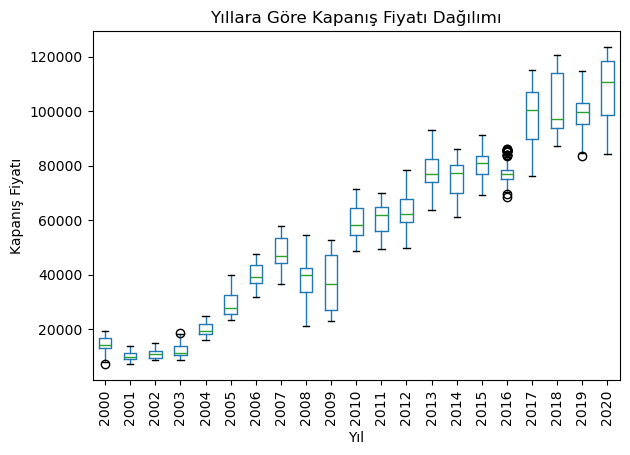

In [221]:
df["Year"] = df["Date"].dt.year  # YÄ±l bilgisini Ã§Ä±kar

plt.figure(figsize=(15, 6), dpi=500)
df.boxplot(column="Close", by="Year", grid=False, rot=90)
plt.title("YÄ±llara GÃ¶re KapanÄ±ÅŸ FiyatÄ± DaÄŸÄ±lÄ±mÄ±")
plt.suptitle("") 
plt.xlabel("YÄ±l")
plt.ylabel("KapanÄ±ÅŸ FiyatÄ±")
plt.tight_layout()
plt.show()

#### 2000-2008 
* 2008 krizi sonrasÄ± (Ã¶zellikle 2009) geniÅŸ kutular dikkat Ã§ekiyor â†’ fiyat dalgalanmalarÄ± fazla olmuÅŸ.
* 2000â€“2004 arasÄ±: Dar kutular â†’ dÃ¼ÅŸÃ¼k volatilite
* 2008â€“2009 ve 2016â€“2019: GeniÅŸ kutular ve uzun whisker'lar â†’ yÃ¼ksek volatilite

#### 2016â€“2020 arasÄ±:
* Outlier sayÄ±sÄ± artmÄ±ÅŸ â†’ uÃ§ deÄŸerler gÃ¶rÃ¼lÃ¼yor Ã¶zellikle 2017 yÄ±lÄ±nda.
* 2019â€“2020 kutularÄ± Ã§ok yukarÄ±da â†’ ciddi deÄŸer artÄ±ÅŸÄ± yaÅŸanmÄ±ÅŸ. PiyasanÄ±n yÃ¼ksek oynaklÄ±k gÃ¶sterdiÄŸine iÅŸaret ediyor

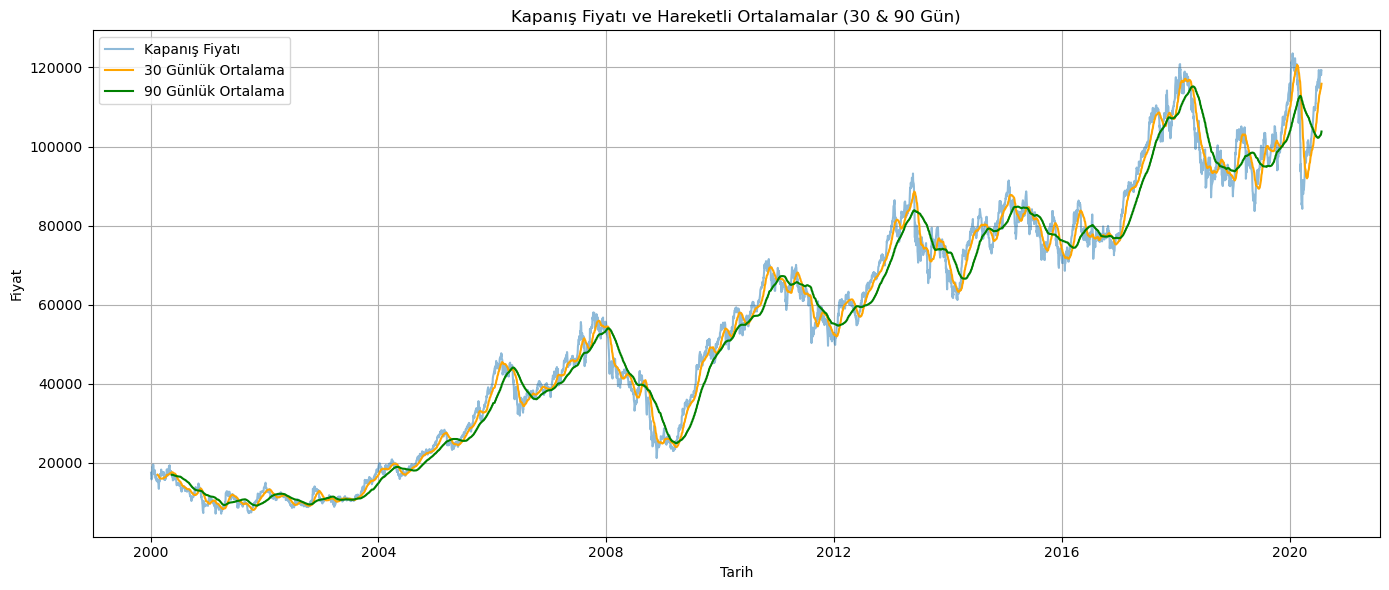

In [222]:
df = df.sort_values("Date")

# Hareketli ortalamalarÄ± hesapla
df["MA_30"] = df["Close"].rolling(window=30).mean()
df["MA_90"] = df["Close"].rolling(window=90).mean()

# Grafik Ã§iz
plt.figure(figsize=(14, 6))
plt.plot(df["Date"], df["Close"], label="KapanÄ±ÅŸ FiyatÄ±", alpha=0.5)
plt.plot(df["Date"], df["MA_30"], label="30 GÃ¼nlÃ¼k Ortalama", color="orange")
plt.plot(df["Date"], df["MA_90"], label="90 GÃ¼nlÃ¼k Ortalama", color="green")
plt.title("KapanÄ±ÅŸ FiyatÄ± ve Hareketli Ortalamalar (30 & 90 GÃ¼n)")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

* 30 GÃ¼nlÃ¼k Hareketli Ortalama (Turuncu Ã‡izgi): KÄ±sa vadeli eÄŸilimi gÃ¶sterir. Fiyattaki ani deÄŸiÅŸimlere daha hÄ±zlÄ± tepki verir.
* 90 GÃ¼nlÃ¼k Hareketli Ortalama (YeÅŸil Ã‡izgi): Uzun vadeli eÄŸilimi gÃ¶sterir. Fiyattaki dalgalanmalardan daha az etkilenir, daha pÃ¼rÃ¼zsÃ¼z bir Ã§izgi Ã§izer.
* Hareketli ortalamalarda da 20 yÄ±llÄ±k sÃ¼reÃ§te yÃ¼kselen bir trend izlediÄŸi gÃ¶zÃ¼kmektedir. 2010 dan sonra bu artÄ± yÃ¶n ivme kazanmÄ±ÅŸtÄ±r.
* Bu sÃ¼reÃ§te zaman zaman dÃ¼ÅŸÃ¼ÅŸlerde yaÅŸanmÄ±ÅŸ dalgalÄ± bir seyir izlenmiÅŸtir.
- NOT: KapanÄ±ÅŸ fiyatÄ± her iki hareketli ortalamanÄ±n da altÄ±ndayken veya altÄ±na dÃ¼ÅŸtÃ¼ÄŸÃ¼nde bir dÃ¼ÅŸÃ¼ÅŸ sinyali olarak yorumlanÄ±r.
30 gÃ¼nlÃ¼k hareketli ortalamanÄ±n 90 gÃ¼nlÃ¼k hareketli ortalamayÄ± aÅŸaÄŸÄ± doÄŸru kesmesi (Ã¶lÃ¼m kesiÅŸimi) genellikle bir dÃ¼ÅŸÃ¼ÅŸ trendinin baÅŸlangÄ±cÄ± olarak kabul edilir. Grafikte 2008 krizi dÃ¶neminde ve diÄŸer bazÄ± dÃ¼ÅŸÃ¼ÅŸ dÃ¶nemlerinde bu tÃ¼r kesiÅŸimler dikkat Ã§ekiyor.

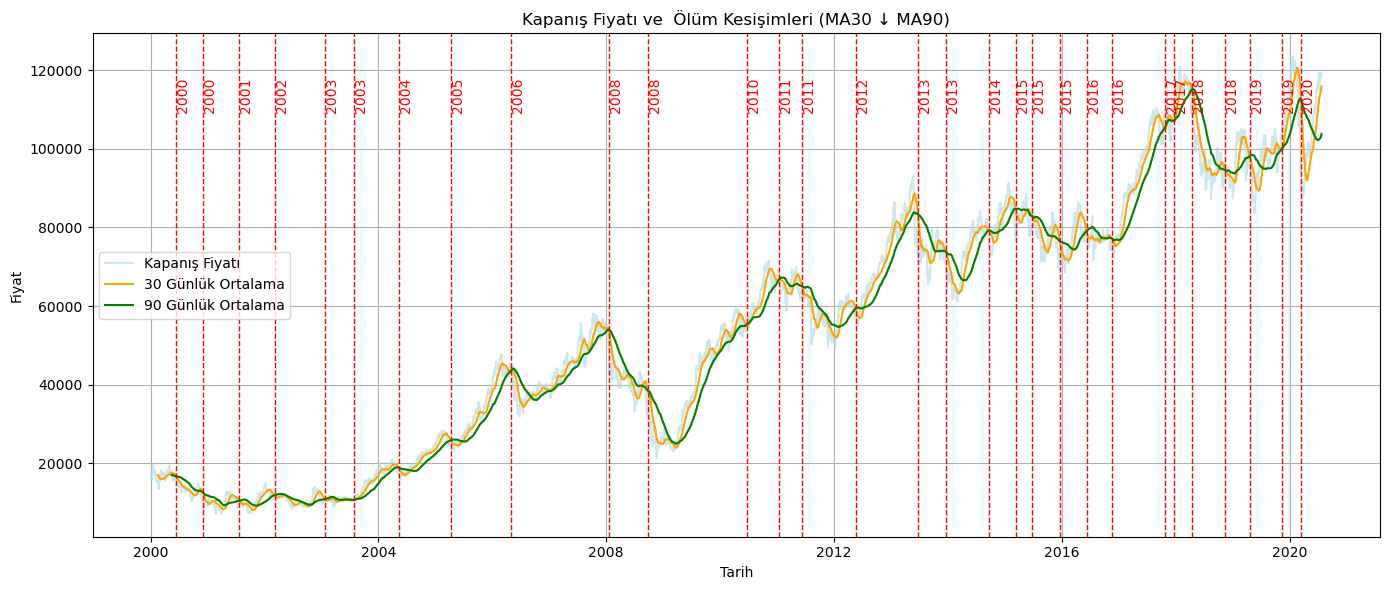

In [223]:
# "Ã¶lÃ¼m kesiÅŸimi" noktalarÄ±nÄ± bul (MA30 â†“ MA90)
df["Death_Cross"] = (df["MA_30"].shift(1) > df["MA_90"].shift(1)) & (df["MA_30"] <= df["MA_90"])

# Bu tarihler listelensin
death_cross_dates = df[df["Death_Cross"]]["Date"].tolist()

# Grafik Ã§iz
plt.figure(figsize=(14, 6))
plt.plot(df["Date"], df["Close"], label="KapanÄ±ÅŸ FiyatÄ±", color='lightblue', alpha=0.6)
plt.plot(df["Date"], df["MA_30"], label="30 GÃ¼nlÃ¼k Ortalama", color="orange")
plt.plot(df["Date"], df["MA_90"], label="90 GÃ¼nlÃ¼k Ortalama", color="green")

# Ã–lÃ¼m kesiÅŸimi noktalarÄ±na kÄ±rmÄ±zÄ± Ã§izgi Ã§ek
for date in death_cross_dates:
    plt.axvline(x=date, color='red', linestyle='--', linewidth=1)
    plt.text(date, df["Close"].max()*0.89, f"{date.year}", rotation=90, color='red', fontsize=10)

# BaÅŸlÄ±k ve eksenler
plt.title("KapanÄ±ÅŸ FiyatÄ± ve  Ã–lÃ¼m KesiÅŸimleri (MA30 â†“ MA90)")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- "Ã–lÃ¼m KesiÅŸimleri("Death Cross)": KÄ±rmÄ±zÄ± dikey Ã§izgilerle iÅŸaretlenen yerler, kÄ±sa vadeli ortalamanÄ±n (turuncu) uzun vadeli ortalamayÄ± (yeÅŸil) aÅŸaÄŸÄ± kestiÄŸi noktalar. Bunlar genellikle gelecekteki dÃ¼ÅŸÃ¼ÅŸ trendlerinin bir sinyali olarak kabul edilmkte. Grafikteki dÃ¼ÅŸÃ¼ÅŸler uyumlu gÃ¶rÃ¼nÃ¼yorlar (Ã¶rn. 2008 krizi, 2018 sonu).

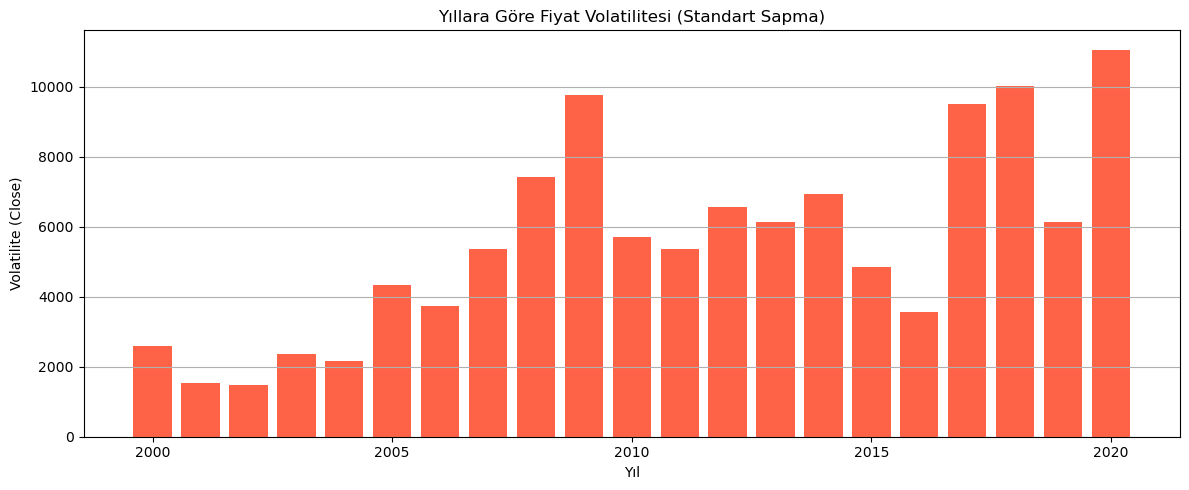

In [224]:
yearly_volatility = df.groupby("Year")["Close"].std().reset_index()

# Grafik Ã§iz
plt.figure(figsize=(12, 5))
plt.bar(yearly_volatility["Year"], yearly_volatility["Close"], color="tomato")
plt.title("YÄ±llara GÃ¶re Fiyat Volatilitesi (Standart Sapma)")
plt.xlabel("YÄ±l")
plt.ylabel("Volatilite (Close)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Grafik Yorumu
* 2000â€™li yÄ±llarÄ±n baÅŸÄ±nda piyasa volatilitesi (deÄŸiÅŸkenliÄŸi) daha dÃ¼ÅŸÃ¼k.
* 2004-2008 dÃ¶neminde volatilite belirgin ÅŸekilde artmÄ±ÅŸ. Ã–zellikle 2008â€™de kÃ¼resel krizle birlikte fiyat oynaklÄ±ÄŸÄ± zirve yapmaktadÄ±r. Grafik, bu dÃ¶nemde piyasalarÄ±n sert dalgalandÄ±ÄŸÄ±nÄ± aÃ§Ä±kÃ§a gÃ¶steriyor.
* 2009-2012: 2008 krizinin ardÄ±ndan volatilite azalsa da, 2000'li yÄ±llarÄ±n baÅŸÄ±na gÃ¶re hala yÃ¼ksek. 2011'de artÄ±ÅŸ gÃ¶rÃ¼lÃ¼rken, 2012'de hafif bir dÃ¼ÅŸÃ¼ÅŸ yaÅŸandÄ±.
* 2013-2016: Volatilite dÃ¼ÅŸÃ¼ÅŸ eÄŸilimine girdi; 2016â€™da piyasa gÃ¶rece sakin ve Ã¶ngÃ¶rÃ¼lebilir bir hale geldi.
* 2017-2020: Volatilite yeniden yÃ¼kseldi. 2017, 2018 ve Ã¶zellikle 2020â€™de, kriz dÃ¶nemini aÅŸan seviyelere ulaÅŸÄ±ldÄ±. 2020'deki artÄ±ÅŸ bÃ¼yÃ¼k Ã¶lÃ§Ã¼de COVID-19â€™un etkisine baÄŸlanabilir.

# Features(Ã–z Nitelik, Ã–zellik) Ekle

In [225]:
df = pd.read_excel("BIST100.xlsx") # dataseti tekrar yÃ¼kle

In [226]:
df.head(2)

Date          Open          High           Low         Close  \
0 2000-01-04  15208.799805  17639.300781  15208.799805  17512.199219   
1 2000-01-05  17512.199219  17802.099609  16237.700195  16932.000000   

      Adj Close    Volume  
0  17512.199219  54538700  
1  16932.000000  66720900

In [227]:
df["Ort10g"] = df["Close"].rolling(window=10).mean() # Ortalama 10 gÃ¼nlÃ¼k deÄŸer
df["Std10g"] = df["Close"].rolling(window=10).std() # 10 gÃ¼nlÃ¼k deÄŸer standart sapmasÄ±
df["MutlakFark"] = (df["Close"] - df["Ort10g"]).abs() # Mutlak Fark kolonunu ekledik

# Yukardaki deÄŸerlerden yeni Ã¶zellikler Ã§Ä±kartÄ±p "risk" faktÃ¶rÃ¼nÃ¼ belirlemek isteriz.

df["PctChange"] = df["Close"].pct_change() * 100      # GÃ¼nlÃ¼k yÃ¼zdelik deÄŸiÅŸim
df["VolatiliteOranÄ±"] = df["Std10g"] / df["Ort10g"]   # Volatilitenin fiyata oranÄ±
df["SapmaOranÄ±"] = df["MutlakFark"] / df["Std10g"]    # Sapma / sapma eÅŸiÄŸi


In [228]:
df.iloc[2575:2585] # Eklenen deÄŸerleri gÃ¶relim 

Date          Open          High           Low         Close  \
2575 2010-04-27  58972.699219  59009.800781  58017.699219  58217.398438   
2576 2010-04-28  57310.898438  58069.800781  56867.000000  57933.101562   
2577 2010-04-29  58160.601562  58760.101562  57899.398438  58702.800781   
2578 2010-04-30  58840.300781  59285.199219  57988.800781  58959.101562   
2579 2010-05-03  58794.398438  58996.898438  58305.300781  58400.199219   
2580 2010-05-04  58565.300781  58861.101562  56862.199219  57341.000000   
2581 2010-05-05  57259.699219  57587.300781  56112.199219  56441.101562   
2582 2010-05-06  56226.101562  56809.000000  55595.398438  55763.601562   
2583 2010-05-07  53804.898438  54381.800781  52570.500000  52687.000000   
2584 2010-05-10  54956.199219  56585.898438  54956.199219  56448.000000   

         Adj Close     Volume        Ort10g       Std10g   MutlakFark  \
2575  58217.398438  566053000  58577.329688   455.511378   359.931250   
2576  57933.101562  713595000  58563.100000   474.749712   629.998437   
2577  58702.800781  564686000  58500.350000   397.216600   202.450781   
2578  58959.101562  618498000  58490.750000   383.233515   468.351562   
2579  58400.199219  573054000  58508.419922   373.491925   108.220703   
2580  57341.000000  692899000  58427.219922   519.195694  1086.219922   
2581  56441.101562  664947000  58182.719922   786.155822  1741.618359   
2582  55763.601562  524133000  57913.990234  1086.299849  2150.388672   
2583  52687.000000  885778000  57348.850391  1959.815763  4661.850391   
2584  56448.000000  716637000  57089.330469  1880.753631   641.330469   

      PctChange  VolatiliteOranÄ±  SapmaOranÄ±  
2575  -1.398638         0.007776    0.790170  
2576  -0.488337         0.008107    1.327012  
2577   1.328600         0.006790    0.509674  
2578   0.436607         0.006552    1.222105  
2579  -0.947949         0.006384    0.289754  
2580  -1.813691         0.008886    2.092120  
2581  -1.569380         0.013512    2.215360  
2582  -1.200366         0.018757    1.979554  
2583  -5.517222         0.034174    2.378719  
2584   7.138383         0.032944    0.340997

## YÃ¶ntem

Makine Ã¶ÄŸrenmesi modelinin daha anlamlÄ± sonuÃ§lar Ã¼retebilmesi iÃ§in, ham fiyat verileri Ã¼zerinden Ã§eÅŸitli tÃ¼retilmiÅŸ Ã¶znitelikler oluÅŸturulmuÅŸtur. Bu Ã¶znitelikler aÅŸaÄŸÄ±daki gibidir:

- **Ort10g**: 10 gÃ¼nlÃ¼k kapanÄ±ÅŸ fiyatlarÄ±nÄ±n hareketli ortalamasÄ±dÄ±r. KÄ±sa vadeli fiyat trendini belirlemek amacÄ±yla kullanÄ±lÄ±r.
- **Std10g**: 10 gÃ¼nlÃ¼k kapanÄ±ÅŸ fiyatlarÄ±nÄ±n standart sapmasÄ±dÄ±r. Bu deÄŸiÅŸken, ilgili periyottaki fiyat oynaklÄ±ÄŸÄ±nÄ± temsil eder.
- **MutlakFark**: KapanÄ±ÅŸ fiyatÄ± ile 10 gÃ¼nlÃ¼k ortalama arasÄ±ndaki mutlak farktÄ±r. KÄ±sa vadeli sapmalarÄ±n ÅŸiddetini Ã¶lÃ§er.
- **PctChange**: KapanÄ±ÅŸ fiyatÄ±nÄ±n bir Ã¶nceki gÃ¼ne gÃ¶re yÃ¼zde deÄŸiÅŸimi. GÃ¼nlÃ¼k getiri oranÄ± olarak yorumlanabilir.
- **VolatiliteOranÄ±**: 10 gÃ¼nlÃ¼k standart sapmanÄ±n ortalamaya oranÄ±dÄ±r. GÃ¶receli volatilite gÃ¶stergesi olarak kullanÄ±lÄ±r.
- **SapmaOranÄ±**: Mutlak farkÄ±n standart sapmaya oranÄ±dÄ±r. Bu oran, fiyatÄ±n istatistiksel normlara gÃ¶re ne kadar sapma gÃ¶sterdiÄŸini ifade eder.

Bu Ã¶zniteliklerle oluÅŸturulan veri seti, modelin fiyat hareketlerini daha iyi Ã¶ÄŸrenebilmesini saÄŸlamÄ±ÅŸtÄ±r. Eksik veriler temizlenmiÅŸ ve model eÄŸitimi iÃ§in uygun formatta hazÄ±rlanmÄ±ÅŸtÄ±r.

Model olarak `LogisticRegression` ve`XGBoostClassifier` kullanÄ±lmÄ±ÅŸ, veri seti %70 eÄŸitim ve %30 test olarak ayrÄ±lmÄ±ÅŸtÄ±r. DeÄŸerlendirme metrikleri arasÄ±nda **accuracy**, **precision**, **recall**, **F1-score** ve Ã¶zellikle **ROC-AUC** yer almaktadÄ±r. 


In [229]:
df["Risk"] = (
    (df["SapmaOranÄ±"] > 1) &                    # Ortalama sapmanÄ±n Ã¼stÃ¼nde
    (df["VolatiliteOranÄ±"] > 0.015) &           # Volatilite Ã§ok dÃ¼ÅŸÃ¼k olmasÄ±n
    (df["PctChange"].abs() > 1)                 # GÃ¼nlÃ¼k %1'den bÃ¼yÃ¼k deÄŸiÅŸim varsa
).astype(int)


### ðŸŽ¯ Risk SÄ±nÄ±flandÄ±rmasÄ±nda KullanÄ±lan KoÅŸullar

#### 1. `SapmaOranÄ± > 1`
- KapanÄ±ÅŸ fiyatÄ±, hareketli ortalamasÄ±ndan **belirgin ÅŸekilde sapma** gÃ¶stermiÅŸtir.
- Bu durum, fiyatÄ±n normal seviyesinden uzaklaÅŸtÄ±ÄŸÄ±nÄ± gÃ¶sterir.
- **Yorum:** FiyatÄ±n ortalamanÄ±n dÄ±ÅŸÄ±na Ã§Ä±kmasÄ± potansiyel bir **risk iÅŸareti** olabilir.

#### 2. `VolatiliteOranÄ± > 0.015`
- GÃ¼nlÃ¼k volatilite **%1.5'in Ã¼zerinde**.
- Bu, piyasada belirli bir **oynaklÄ±k (volatilite)** olduÄŸunu gÃ¶sterir.
- **Yorum:** Volatilitenin Ã§ok dÃ¼ÅŸÃ¼k olduÄŸu gÃ¼nlerde piyasa duraÄŸandÄ±r ve bu genellikle riskli kabul edilmez. Ancak yÃ¼ksek volatilite, riskin arttÄ±ÄŸÄ±nÄ± gÃ¶sterir.

#### 3. `|PctChange| > 1`
- GÃ¼nlÃ¼k kapanÄ±ÅŸ fiyatÄ±nda **%1'in Ã¼zerinde bir deÄŸiÅŸim** (yukarÄ± ya da aÅŸaÄŸÄ±) yaÅŸanmÄ±ÅŸtÄ±r.
- **Yorum:** BÃ¶yle bir deÄŸiÅŸim, piyasada **ani ve bÃ¼yÃ¼k hareketler** olduÄŸunu gÃ¶sterir ve bu da riski artÄ±rabilir.


## Hedef DeÄŸiÅŸken: Risk

"Risk" adlÄ± hedef deÄŸiÅŸken, ertesi gÃ¼n kapanÄ±ÅŸ fiyatÄ±nÄ±n %1 ve Ã¼zeri artÄ±ÅŸ gÃ¶stermesi durumunda **1 (riskli)**, aksi halde **0 (risksiz)** olacak ÅŸekilde etiketlenmiÅŸtir. Bu, kÄ±sa vadeli yatÄ±rÄ±mcÄ± aÃ§Ä±sÄ±ndan fiyat oynaklÄ±ÄŸÄ±na dayalÄ± bir risk gÃ¶stergesi olarak ele alÄ±nmÄ±ÅŸtÄ±r.


In [230]:
df.iloc[2465:2470] # Eklenen deÄŸerleri gÃ¶relim 

Date          Open          High           Low         Close  \
2465 2009-11-18  47271.101562  47271.101562  46112.500000  46419.898438   
2466 2009-11-19  46341.601562  46668.699219  45635.898438  46114.601562   
2467 2009-11-20  46091.300781  46433.300781  44798.000000  45231.000000   
2468 2009-11-23  45650.300781  45826.101562  44678.500000  45801.398438   
2469 2009-11-24  45312.300781  46032.101562  45014.601562  45513.500000   

         Adj Close     Volume        Ort10g       Std10g   MutlakFark  \
2465  46419.898438  636280000  47866.779687   857.281575  1446.881250   
2466  46114.601562  764810000  47748.439844  1012.201120  1633.838281   
2467  45231.000000  571836000  47574.550000  1275.842198  2343.550000   
2468  45801.398438  500823000  47377.239844  1389.033769  1575.841406   
2469  45513.500000  513373000  47115.079688  1474.849358  1601.579688   

      PctChange  VolatiliteOranÄ±  SapmaOranÄ±  Risk  
2465  -1.742686         0.017910    1.687755     1  
2466  -0.657685         0.021199    1.614144     0  
2467  -1.916099         0.026818    1.836865     1  
2468   1.261079         0.029319    1.134487     1  
2469  -0.628580         0.031303    1.085928     0

| SÃ¼tun             | AnlamÄ±                                        |                |   |
| ----------------- | --------------------------------------------- | -------------- | - |
| `Ort10g`          | Son 10 gÃ¼nÃ¼n kapanÄ±ÅŸ fiyatÄ± ortalamasÄ±        |                |   |
| `Std10g`          | Son 10 gÃ¼nÃ¼n standart sapmasÄ± (oynaklÄ±k)      |                |   |
| `MutlakFark`      | GÃ¼nlÃ¼k kapanÄ±ÅŸ ile ortalama arasÄ±ndaki fark ( | Close âˆ’ Ort10g | ) |
| `PctChange`       | GÃ¼nlÃ¼k yÃ¼zdelik deÄŸiÅŸim (Close farkÄ± %)       |                |   |
| `VolatiliteOranÄ±` | Std10g / Ort10g â†’ oynaklÄ±ÄŸÄ±n fiyata oranÄ±     |                |   |
| `SapmaOranÄ±`      | MutlakFark / Std10g â†’ sapmanÄ±n anlamlÄ±lÄ±ÄŸÄ±    |                |   |
| `Risk`            | Hedef sÃ¼tun (0 = risksiz, 1 = riskli)         |                |   |


In [231]:
df["Risk"].value_counts()


Risk
0    4014
1    1133
Name: count, dtype: int64

* NOT: Riskli ve Risksiz deÄŸerlerin arasÄ±ndaki fark oldukÃ§a yÃ¼ksek old. iÃ§in bu deÄŸerde dengeyi korumalÄ±yÄ±z bu sebeple => Stratify=y ve class_weight='balanced' ile eÄŸitim ve test verilerinde y deÄŸiÅŸkenindeki sÄ±nÄ±f oranlarÄ±nÄ±n (yani 0 ve 1 oranÄ±nÄ±n) korunmasÄ±nÄ± saÄŸlayacaÄŸÄ±z. Bunun yanÄ±nda SMOTE (Synthetic Minority Over-sampling Technique) kullanarak sentetik veri de Ã¼retilip bu dengesizlik giderilebilir.


#### AMAÃ‡ : BIST100 verisinde gÃ¼nÃ¼n "riskli (1)" veya "risksiz (0)" olup olmadÄ±ÄŸÄ±nÄ± tahmin eden bir model kurmak.

In [232]:
df.head(10)

Date          Open          High           Low         Close  \
0 2000-01-04  15208.799805  17639.300781  15208.799805  17512.199219   
1 2000-01-05  17512.199219  17802.099609  16237.700195  16932.000000   
2 2000-01-06  16932.000000  17460.699219  16086.799805  16200.000000   
3 2000-01-07  16200.000000  16305.599609  15623.500000  15837.400391   
4 2000-01-11  15837.400391  16388.300781  15293.200195  16347.400391   
5 2000-01-12  16347.400391  17304.199219  16347.400391  16933.599609   
6 2000-01-13  16933.599609  18256.800781  16933.599609  18138.199219   
7 2000-01-14  18138.199219  19332.099609  18138.199219  19110.300781   
8 2000-01-17  19110.300781  20617.900391  18301.300781  18458.300781   
9 2000-01-18  18458.300781  19577.300781  18182.500000  19577.300781   

      Adj Close    Volume        Ort10g       Std10g   MutlakFark  PctChange  \
0  17512.199219  54538700           NaN          NaN          NaN        NaN   
1  16932.000000  66720900           NaN          NaN          NaN  -3.313115   
2  16200.000000  66095000           NaN          NaN          NaN  -4.323175   
3  15837.400391  25444400           NaN          NaN          NaN  -2.238269   
4  16347.400391  53618400           NaN          NaN          NaN   3.220225   
5  16933.599609  59691700           NaN          NaN          NaN   3.585886   
6  18138.199219  73641700           NaN          NaN          NaN   7.113665   
7  19110.300781  67855200           NaN          NaN          NaN   5.359416   
8  18458.300781  73244200           NaN          NaN          NaN  -3.411773   
9  19577.300781  59548700  17504.670117  1276.278149  2072.630664   6.062313   

   VolatiliteOranÄ±  SapmaOranÄ±  Risk  
0              NaN         NaN     0  
1              NaN         NaN     0  
2              NaN         NaN     0  
3              NaN         NaN     0  
4              NaN         NaN     0  
5              NaN         NaN     0  
6              NaN         NaN     0  
7              NaN         NaN     0  
8              NaN         NaN     0  
9         0.072911    1.623965     1

In [233]:
df = df.dropna() # 10gÃ¼nlÃ¼k verilerde NaN hatasÄ± almamak iÃ§in(ilk 9 veri NaN olacak hesaplanamadÄ±ÄŸÄ± iÃ§in)

In [234]:
X = df[["Open", "High", "Low", "Close", "Adj Close", "Volume"]] #  tahmin iÃ§in kullanÄ±lacak Ã¶zellikler (features)

y = df["Risk"] # Target(Hedef) => tahmin edilmek istenen sÃ¼tun

In [235]:
correlations = df.corr(numeric_only=True)["Risk"].sort_values(ascending=False) # Risk en Ã§ok etki eden deÄŸerler
print(correlations) # Risk Ã¼zerinde kolerasyonu olan deÄŸerleri gÃ¶rmek iÃ§in bunlarÄ± trainden Ã§Ä±kartÄ±yoruz



Risk               1.000000
SapmaOranÄ±         0.523192
MutlakFark         0.382479
VolatiliteOranÄ±    0.305153
Std10g             0.114130
PctChange         -0.033444
Volume            -0.056444
Ort10g            -0.186654
High              -0.189167
Open              -0.191773
Close             -0.192629
Adj Close         -0.192629
Low               -0.195483
Name: Risk, dtype: float64


In [236]:
from sklearn.linear_model import LogisticRegression # Regresyon modeli
from sklearn.model_selection import train_test_split # train-test
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # Gerekli metrik kÃ¼tÃ¼phaneleri ekle

In [237]:
# Modeli kur
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=21, stratify=y  # RÄ°SK startify=y diyerek sÄ±nÄ±f oranÄ±nÄ± koruyoruz.
) # test verimiz toplam verinin %30'si(test_size=0.2)

model = LogisticRegression(max_iter=1000, class_weight='balanced') # Risk deÄŸerini dengelemek iÃ§in)
model.fit(X_train, y_train) # EÄŸitimi gerÃ§ekleÅŸtir.

y_pred = model.predict(X_test) # EÄŸitim verisi tahmini
y_train_pred = model.predict(X_train)    # Test verisi tahmini


# SonuÃ§lar
print(confusion_matrix(y_test, y_pred)) # KarmaÅŸÄ±klÄ±k matrisi: GerÃ§ek vs tahmin (pozitif/negatif sayÄ±lar)
print(classification_report(y_test, y_pred)) #  SÄ±nÄ±flandÄ±rma raporu: precision, recall, f1-score vs.
print("Train Accuracy:", accuracy_score(y_train, y_train_pred)) # EÄŸitimin doÄŸruluÄŸu
print("Test Accuracy:", accuracy_score(y_test, y_pred))         # Test doÄŸruluÄŸu

[[849 353]
 [ 93 247]]
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1202
           1       0.41      0.73      0.53       340

    accuracy                           0.71      1542
   macro avg       0.66      0.72      0.66      1542
weighted avg       0.79      0.71      0.73      1542

Train Accuracy: 0.7066184649610678
Test Accuracy: 0.7107652399481194


- [[849 353]     â†’ SÄ±nÄ±f 0 (Risksiz): 849 doÄŸru, 353 yanlÄ±ÅŸ pozitif (Riskli sanÄ±lmÄ±ÅŸ)
- [ 93 247]]    â†’ SÄ±nÄ±f 1 (Riskli):   247 doÄŸru, 93 yanlÄ±ÅŸ negatif (Riskli sanÄ±lmamÄ±ÅŸ)


| Terim         | AnlamÄ±                                                                                      |
| ------------- | ------------------------------------------------------------------------------------------- |
| **Accuracy**  | DoÄŸru tahminlerin tÃ¼m tahminlere oranÄ±                                                      |
| **Precision** | "Riskli" dediÄŸimiz gÃ¼nlerin gerÃ§ekten riskli olma oranÄ± (az yanlÄ±ÅŸ alarm istiyorsak Ã¶nemli) |
| **Recall**    | GerÃ§ekten riskli olan gÃ¼nleri bulma oranÄ± (riskli gÃ¼nleri kaÃ§Ä±rmak istemiyorsak Ã¶nemli)     |
| **F1-score**  | Precision ile Recallâ€™un dengeli ortalamasÄ±                                                  |
| **Support**   | Her sÄ±nÄ±ftan kaÃ§ tane Ã¶rnek olduÄŸu                                                          |


* Risksiz olanlarÄ±n %90'Ä±nÄ± doÄŸru tahmin etmiÅŸ ama sadece %71â€™ini yakalayabilmiÅŸ. 
* Riskli tahminler iÃ§in precision dÃ¼ÅŸÃ¼k ama recall deÄŸeri yÃ¼ksek bu da riskli olmayan gÃ¼nlere de riskli deme eÄŸiliminde olduÄŸunu gÃ¶steriyor.



In [238]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test) # EÄŸitim verisi tahmini
y_train_pred = model.predict(X_train)    # Test verisi tahmini


# SonuÃ§lar
print(confusion_matrix(y_test, y_pred)) # KarmaÅŸÄ±klÄ±k matrisi: GerÃ§ek vs tahmin (pozitif/negatif sayÄ±lar)
print(classification_report(y_test, y_pred)) #  SÄ±nÄ±flandÄ±rma raporu: precision, recall, f1-score vs.
print("Train Accuracy:", accuracy_score(y_train, y_train_pred)) # EÄŸitimin doÄŸruluÄŸu
print("Test Accuracy:", accuracy_score(y_test, y_pred))         # Test doÄŸruluÄŸu


[[1108   94]
 [ 276   64]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1202
           1       0.41      0.19      0.26       340

    accuracy                           0.76      1542
   macro avg       0.60      0.56      0.56      1542
weighted avg       0.71      0.76      0.72      1542

Train Accuracy: 0.8976640711902113
Test Accuracy: 0.7600518806744487


* Train Accuracy: 0.897 â†’ Model eÄŸitim verisini neredeyse ezberlemiÅŸ.

* Test Accuracy: 0.760 â†’ EÄŸitim ve test doÄŸruluÄŸu arasÄ±nda ciddi fark var â†’ Overfitting belirtisi.

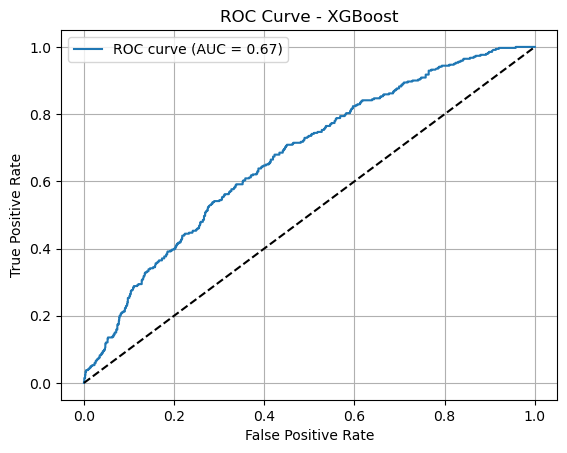

In [239]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix


# Modelin test verisi Ã¼zerindeki sÄ±nÄ±f olasÄ±lÄ±klarÄ±nÄ± alÄ±yoruz (sadece pozitif sÄ±nÄ±f iÃ§in)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # predict_proba ile sÄ±nÄ±f 1 (pozitif sÄ±nÄ±f) olasÄ±lÄ±klarÄ±nÄ± al

# AUC (Area Under the Curve) deÄŸerini hesapla â€” modelin ayrÄ±ÅŸtÄ±rma gÃ¼cÃ¼nÃ¼ gÃ¶sterir
roc_auc = roc_auc_score(y_test, y_pred_proba)

# ROC eÄŸrisi iÃ§in gerekli olan False Positive Rate (fpr) ve True Positive Rate (tpr) deÄŸerlerini al
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# ROC eÄŸrisini Ã§izeriz â€” yatay eksen: False Positive Rate, dikey eksen: True Positive Rate
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')

# BaÅŸarÄ± ÅŸansÄ± (random tahmin) iÃ§in referans Ã§izgisi (45 derece)
plt.plot([0, 1], [0, 1], 'k--')

# Eksen ve baÅŸlÄ±k ayarlarÄ±
plt.xlabel('False Positive Rate')  # YanlÄ±ÅŸ pozitif oranÄ± (1 sÄ±nÄ±fÄ±na yanlÄ±ÅŸlÄ±kla atanmÄ±ÅŸ 0 sÄ±nÄ±fÄ± Ã¶rneklerin oranÄ±)
plt.ylabel('True Positive Rate')   # DoÄŸru pozitif oranÄ± (1 sÄ±nÄ±fÄ±na doÄŸru ÅŸekilde atanmÄ±ÅŸ 1 Ã¶rneklerin oranÄ±)
plt.title('ROC Curve - XGBoost')  # Grafik baÅŸlÄ±ÄŸÄ±

plt.legend()       # EÄŸri etiketini gÃ¶ster
plt.grid(True)     # Arka plan Ä±zgarasÄ±nÄ± aÃ§
plt.show()         # GrafiÄŸi gÃ¶rÃ¼ntÃ¼le



#### ROC eÄŸrisi, modelin pozitif sÄ±nÄ±fÄ± ayÄ±rt etme kapasitesini grafiksel olarak gÃ¶sterir. Modelin ROC AUC deÄŸeri 0.67 olarak hesaplanmÄ±ÅŸtÄ±r. Bu, modelin sÄ±nÄ±flar arasÄ±nda %67 oranÄ±nda doÄŸru ayrÄ±m yapabildiÄŸini ve rastgele bir tahminden daha baÅŸarÄ±lÄ± olduÄŸunu gÃ¶stermektedir.

## 1. Parametre Arama AÅŸamasÄ± (Grid Search)

In [245]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1, 5]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

#  Model EÄŸitimi ve En Ä°yinin SeÃ§ilmesi
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)



Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 1, 5],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='f1', verbose=1)

##  Tahmin ve Performans DeÄŸerlendirme

In [246]:
best_model = grid_search.best_estimator_

# Tahminler
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Metrikler -  SonuÃ§larÄ±n YazdÄ±rÄ±lmasÄ±
print("Best Parameters:", grid_search.best_params_) # en olasÄ± parametreleri yazdÄ±r
print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_proba))


Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1202
           1       0.40      0.22      0.28       340

    accuracy                           0.76      1542
   macro avg       0.60      0.56      0.57      1542
weighted avg       0.72      0.76      0.73      1542

AUC: 0.666410149750416


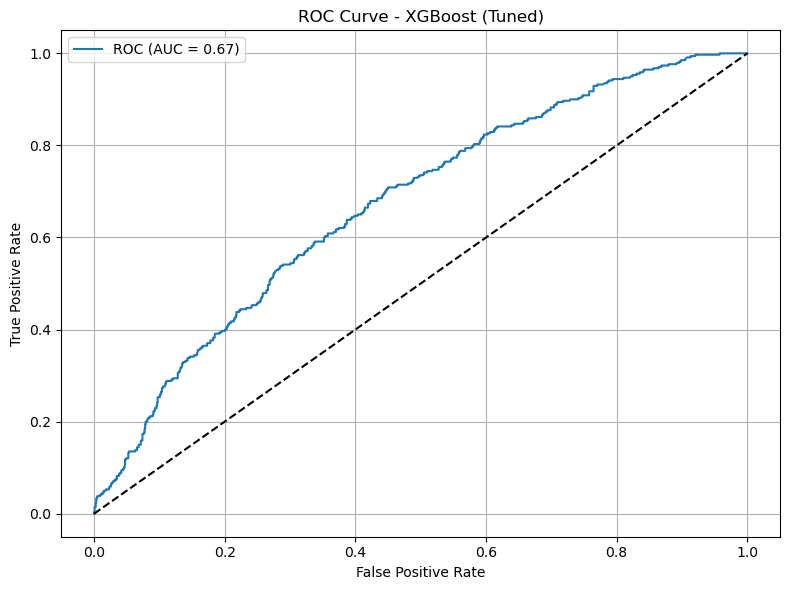

In [244]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost (Tuned)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



## SonuÃ§
Bu Ã§alÄ±ÅŸmada, BIST100 verileriyle gÃ¼nlÃ¼k bazda riskli gÃ¼nlerin sÄ±nÄ±flandÄ±rÄ±lmasÄ± hedeflenmiÅŸtir. Risk tanÄ±mÄ±; yÃ¼ksek sapma, yÃ¼ksek volatilite ve %1'den bÃ¼yÃ¼k gÃ¼nlÃ¼k deÄŸiÅŸime gÃ¶re yapÄ±lmÄ±ÅŸtÄ±r.

XGBoostClassifier modeli GridSearchCV ile optimize edilmiÅŸ ve en iyi parametrelerle test verisinde ÅŸu sonuÃ§lar elde edilmiÅŸtir:

Accuracy: 0.76

Riskli sÄ±nÄ±f (1) F1-score: 0.28

AUC: 0.67

Model, risksiz gÃ¼nleri baÅŸarÄ±lÄ± ÅŸekilde ayÄ±rabilse de, riskli gÃ¼nleri saptamada zayÄ±f kalmÄ±ÅŸtÄ±r. AUC deÄŸeri ortalama bir ayrÄ±ÅŸtÄ±rma gÃ¼cÃ¼nÃ¼ gÃ¶stermektedir.